# California Housing Price Predictor
---

## Import Libaries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Data Loading 
---

In [2]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that in the column 'total_bedrooms', there is about 200 null-value data points. 

- We can either impute them with the median or drop the rows. Either approach would work for our task.

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Split the data set into train and test sets

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9344,-122.57,37.99,38.0,5587.0,996.0,2466.0,1027.0,4.1711,NEAR BAY,336900.0
11467,-117.99,33.66,14.0,3155.0,653.0,951.0,575.0,3.0625,<1H OCEAN,268800.0
18351,-122.18,37.41,21.0,1034.0,117.0,323.0,117.0,10.7237,NEAR OCEAN,500001.0
17287,-119.74,34.35,34.0,1664.0,292.0,705.0,257.0,5.0000,NEAR OCEAN,329400.0
3810,-118.47,34.21,34.0,2512.0,603.0,1805.0,584.0,2.9735,<1H OCEAN,220000.0
...,...,...,...,...,...,...,...,...,...,...
336,-122.17,37.74,46.0,1026.0,226.0,749.0,225.0,3.0298,NEAR BAY,107600.0
4659,-118.31,34.05,35.0,1692.0,423.0,1578.0,406.0,2.5313,<1H OCEAN,305800.0
7616,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,<1H OCEAN,203500.0
9911,-122.28,38.31,52.0,58.0,18.0,48.0,22.0,1.7600,NEAR BAY,166700.0


## Exploratory Data Analysis (EDA)

### Visualizing Data Distribution

- We’ll create histograms to visualize the distribution of various features.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

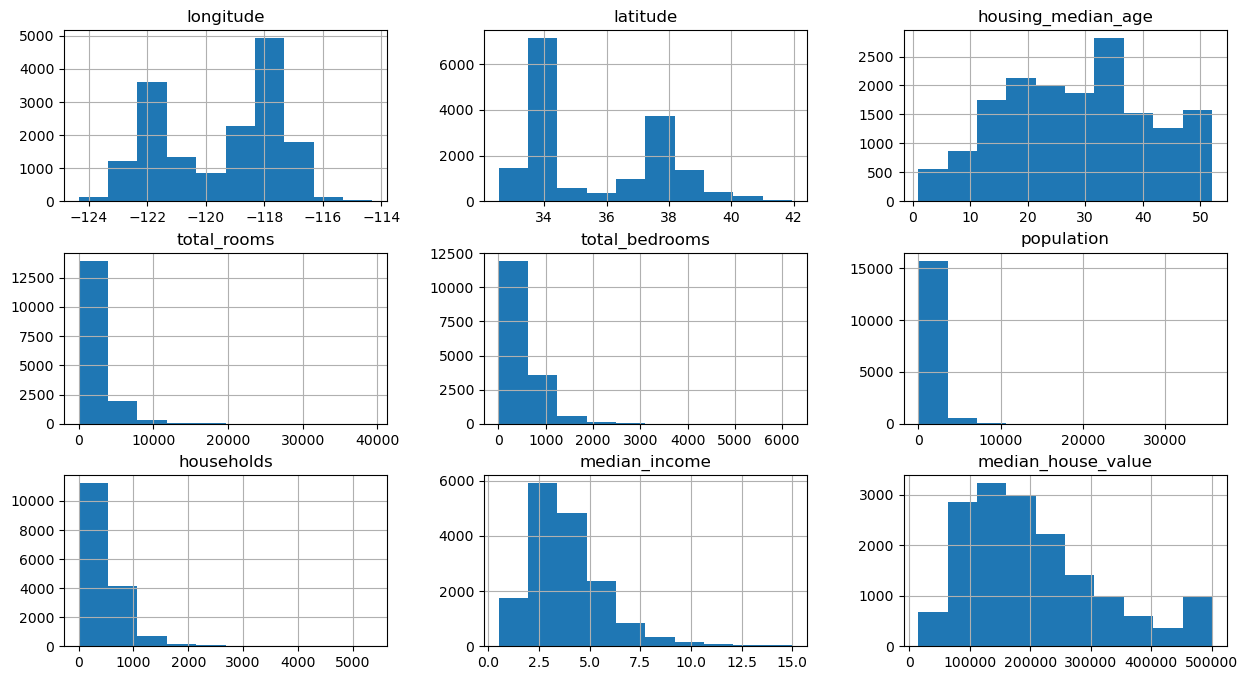

In [9]:
train_data.hist(figsize=(15,8))

### Correlation Matrix
- We drop the non-numeric column ‘ocean_proximity’ temporarily to plot a heatmap of the correlation matrix.

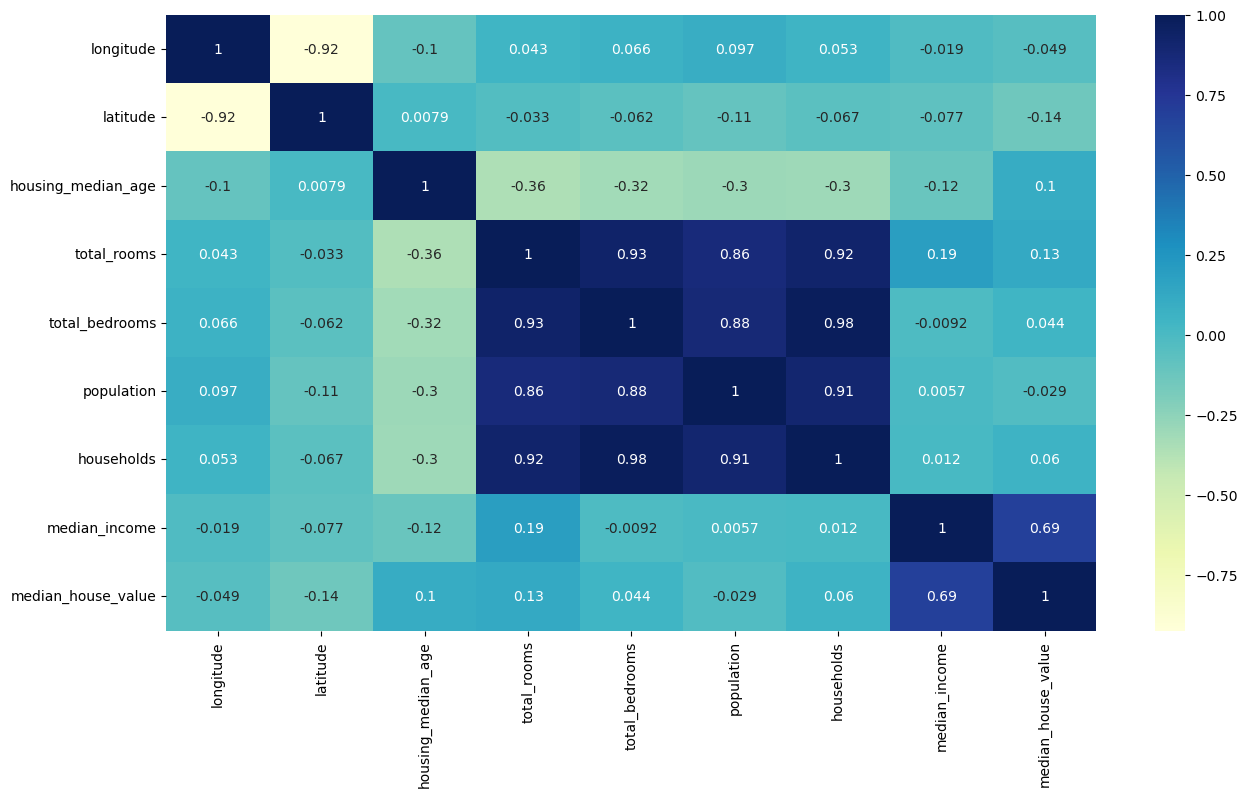

In [10]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Data Preprocessing
- We apply logarithmic transformation to certain skewed features to normalize their distribution.
---

In [11]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

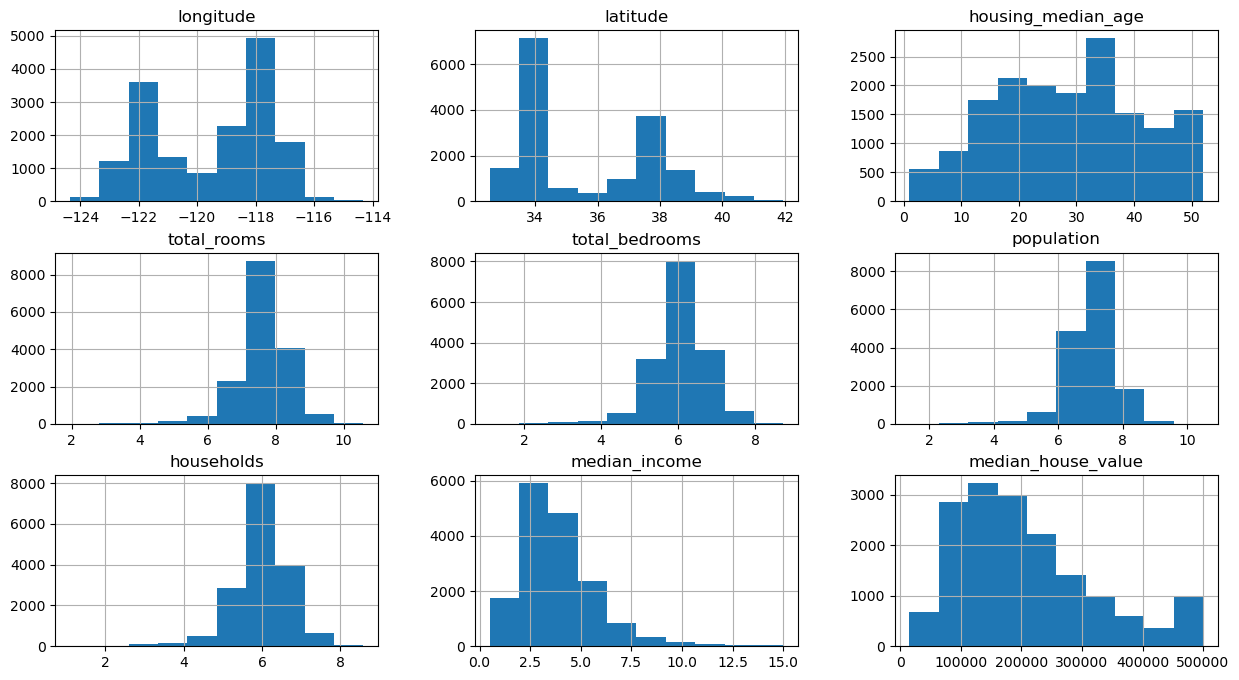

In [12]:
train_data.hist(figsize=(15,8))
plt.show()

### Encoding Categorical Features
- We encode the categorical feature ‘ocean_proximity’ using one-hot encoding.

In [13]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7260
INLAND        5193
NEAR OCEAN    2100
NEAR BAY      1790
ISLAND           3
Name: ocean_proximity, dtype: int64

In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9344,-122.57,37.99,38.0,8.628377,6.904751,7.810758,6.935370,4.1711,336900.0,0,0,0,1,0
11467,-117.99,33.66,14.0,8.057061,6.483107,6.858565,6.356108,3.0625,268800.0,1,0,0,0,0
18351,-122.18,37.41,21.0,6.942157,4.770685,5.780744,4.770685,10.7237,500001.0,0,0,0,0,1
17287,-119.74,34.35,34.0,7.417580,5.680173,6.559615,5.552960,5.0000,329400.0,0,0,0,0,1
3810,-118.47,34.21,34.0,7.829233,6.403574,7.498870,6.371612,2.9735,220000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-122.17,37.74,46.0,6.934397,5.424950,6.620073,5.420535,3.0298,107600.0,0,0,0,1,0
4659,-118.31,34.05,35.0,7.434257,6.049733,7.364547,6.008813,2.5313,305800.0,1,0,0,0,0
7616,-118.22,33.86,16.0,9.074864,7.306531,8.280204,7.309212,5.1948,203500.0,1,0,0,0,0
9911,-122.28,38.31,52.0,4.077537,2.944439,3.891820,3.135494,1.7600,166700.0,0,0,0,1,0


### Updated Correlation Matrix

- After preprocessing, we plot the updated correlation matrix.

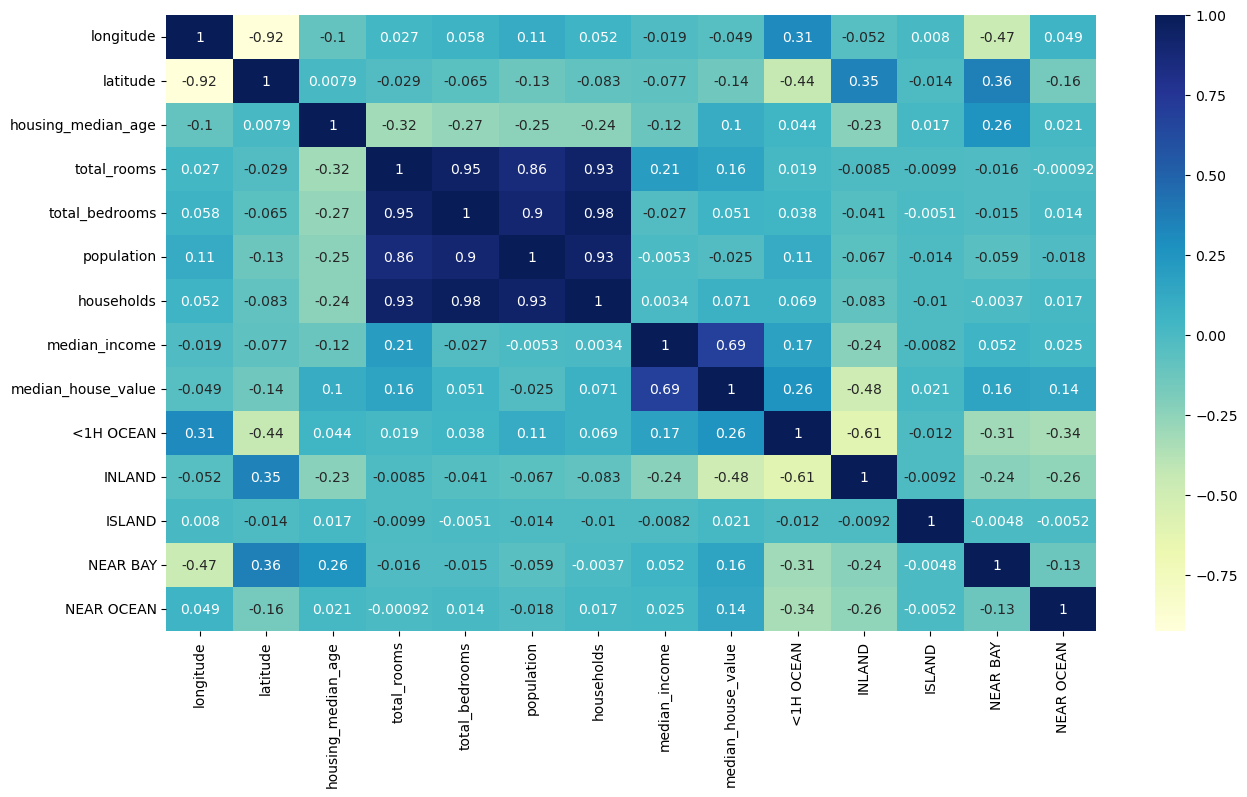

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

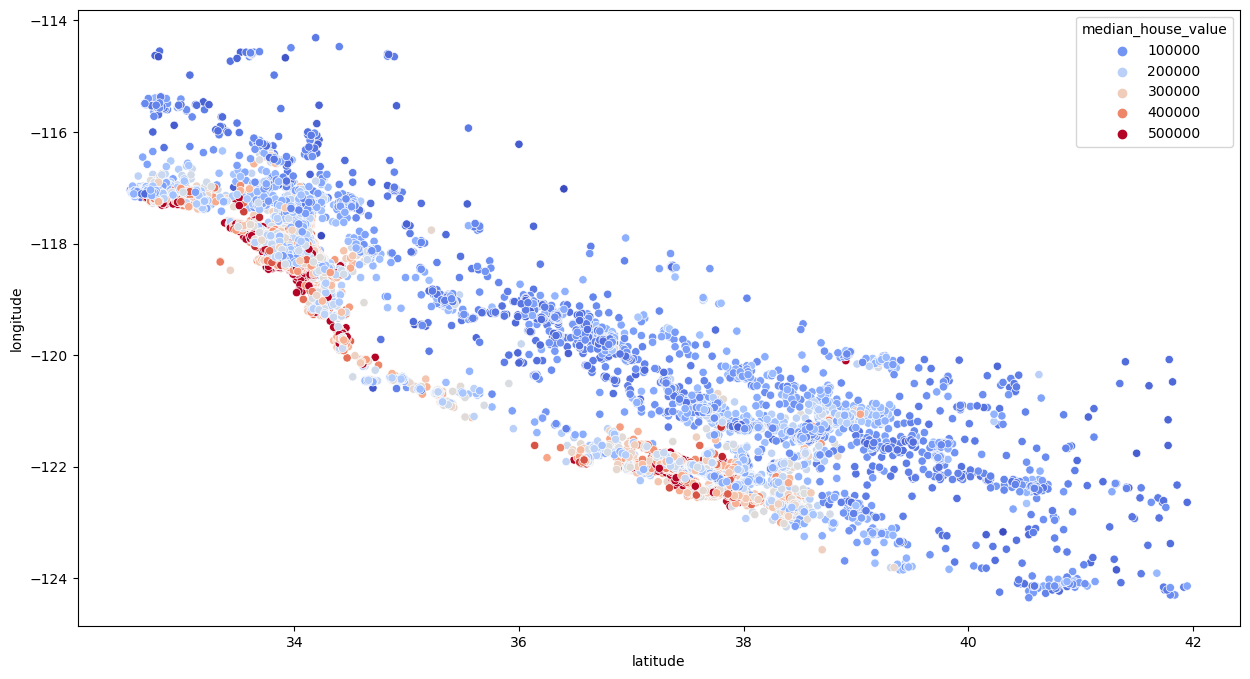

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

## Feature Engineering
- We create new features based on existing ones to provide more information to our model.
---

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

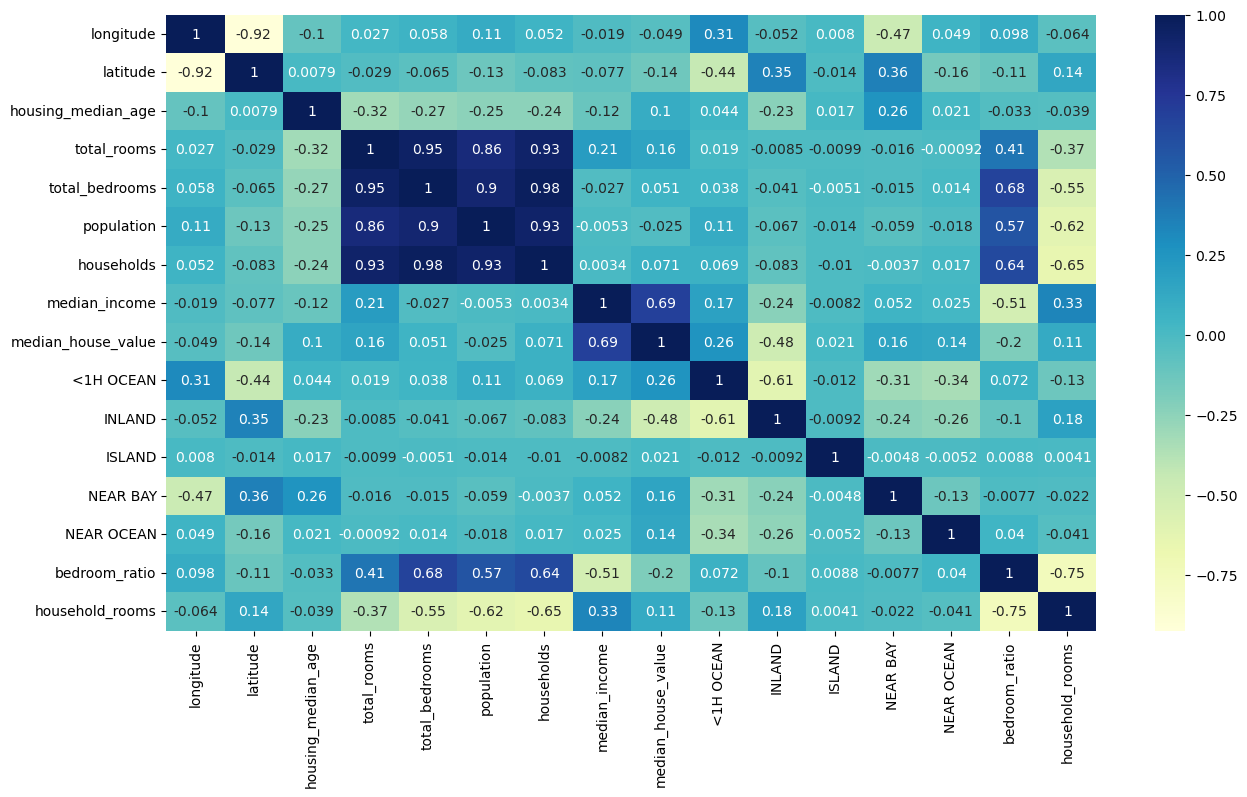

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Initial Model: Linear Regression
- We start with a simple Linear Regression model.
---

### Scaling the Features
- We scale the features using StandardScaler.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)




### Training the Model
- We train the Linear Regression model on the scaled training data.

In [21]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

### Preparing Test Data
- We preprocess the test data similarly to the training data.

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


### Evaluating Linear Regression
- We evaluate the Linear Regression model on the test data.

In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6820463848027545

In [24]:
y_pred_r = reg.predict(X_test_s)

In [25]:
df_dictr = {'Index': [i for i in range(len(X_test_s))], 'Actual': y_test, 'Predicted': y_pred_r}
df_r = pd.DataFrame(df_dictr)

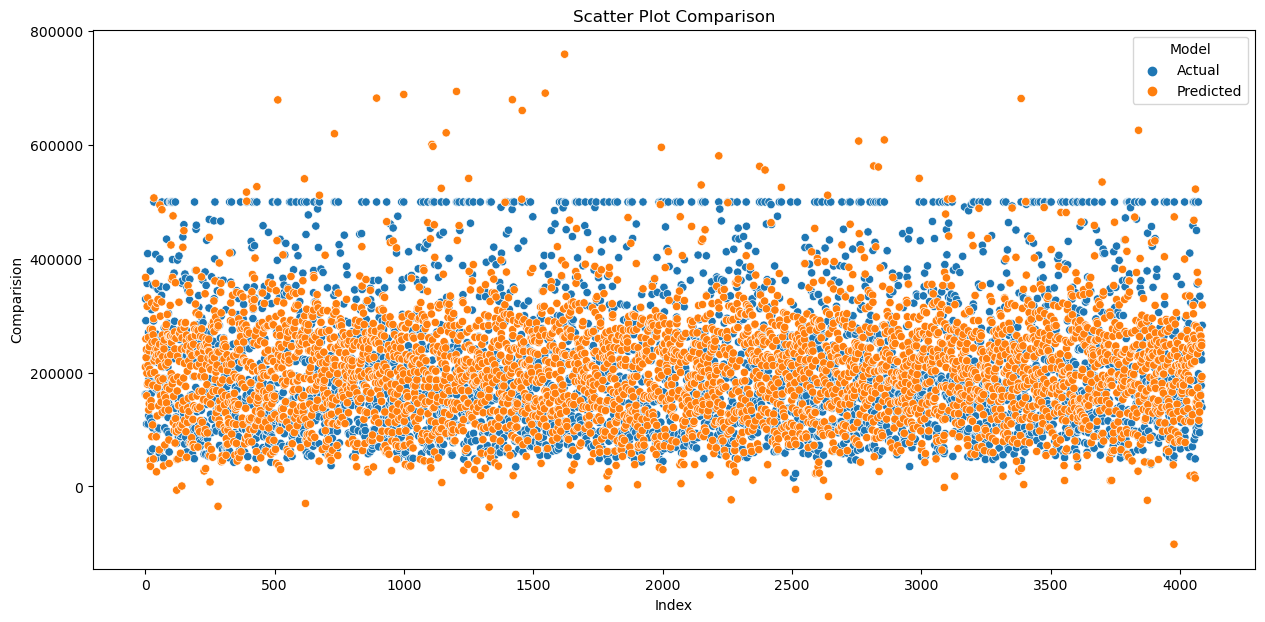

In [26]:
plt.figure(figsize=(15, 7))
data_long_f = pd.melt(df_r, id_vars=['Index'], value_vars=['Actual', 'Predicted'],
                    var_name='Model', value_name='Comparision')
sns.scatterplot(data=data_long_f, x="Index", y="Comparision", hue="Model")

plt.xlabel('Index')
plt.ylabel('Comparision')
plt.title('Scatter Plot Comparison')

plt.show()

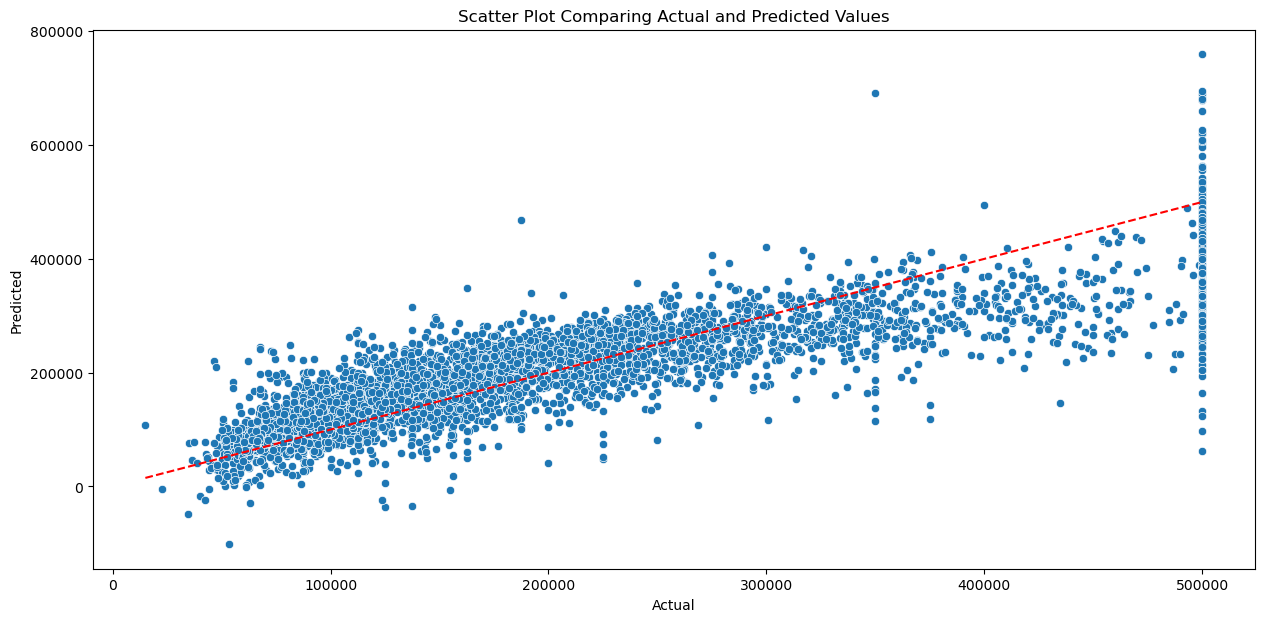

In [27]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_r, x='Actual', y='Predicted')

# Add a diagonal line for reference
plt.plot([min(df_r['Actual']), max(df_r['Actual'])], [min(df_r['Actual']), max(df_r['Actual'])], 'r--')

# Set plot labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot Comparing Actual and Predicted Values')

# Show the plot
plt.show()

In [28]:
train_r = reg.score(X_train_s, y_train)
test_r = reg.score(X_test_s, y_test)
mse_r = mean_squared_error(y_test, y_pred_r)
r2s_r = r2_score(y_test, y_pred_r)

In [29]:
print("Train Accuracy:",train_r*100)
print("Test Accuracy:",test_r*100)
print(f"Mean Squared Error: {mse_r}")
print(f"R2 Score: {r2s_r*100}")

Train Accuracy: 66.82571867110644
Test Accuracy: 68.20463848027545
Mean Squared Error: 4203746266.1685843
R2 Score: 68.20463848027545


## Improved Model: Random Forest Regressor
- Finally, we try a more advanced model, the Random Forest Regressor.


### Training the Random Forest Model

- We train the Random Forest model on the scaled training data.

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

### Evaluating the Random Forest Model
- We evaluate the Random Forest model on the test data.

In [31]:
forest.score(X_test_s, y_test)

0.8217414635938182

### Saving Model as pickle file

In [32]:
with open('model.pkl', 'wb') as file:
    pickle.dump(forest, file)

In [33]:
y_pred_f = forest.predict(X_test_s)

In [34]:
df_dictf = {'Index': [i for i in range(len(X_test_s))], 'Actual': y_test, 'Predicted': y_pred_f}

In [35]:
df_f = pd.DataFrame(df_dictf)

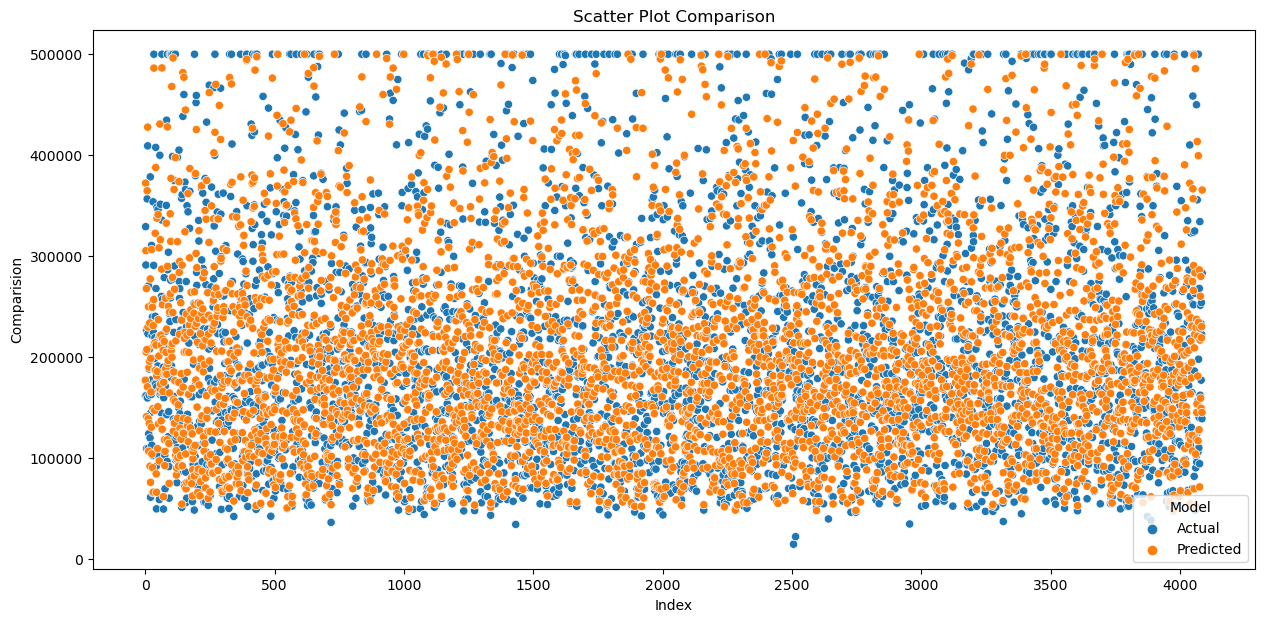

In [36]:
plt.figure(figsize=(15, 7))
data_long_f = pd.melt(df_f, id_vars=['Index'], value_vars=['Actual', 'Predicted'],
                    var_name='Model', value_name='Comparision')
sns.scatterplot(data=data_long_f, x="Index", y="Comparision", hue="Model")

plt.xlabel('Index')
plt.ylabel('Comparision')
plt.title('Scatter Plot Comparison')

plt.show()

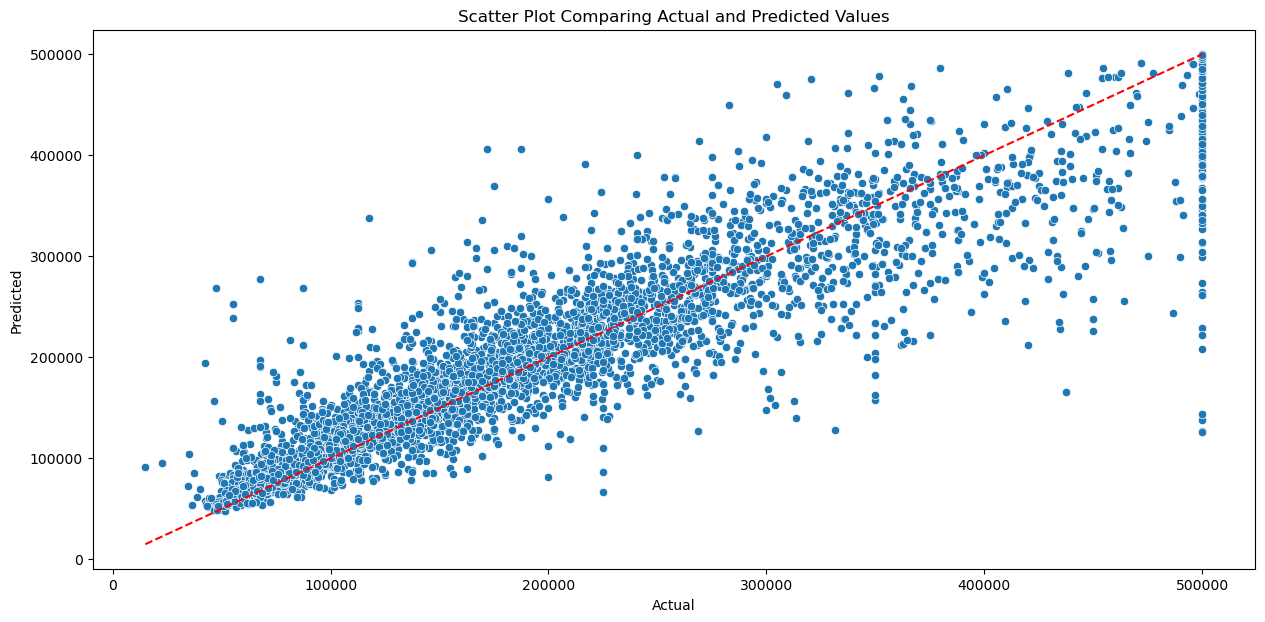

In [37]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_f, x='Actual', y='Predicted')

# Add a diagonal line for reference
plt.plot([min(df_f['Actual']), max(df_f['Actual'])], [min(df_f['Actual']), max(df_f['Actual'])], 'r--')

# Set plot labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot Comparing Actual and Predicted Values')

# Show the plot
plt.show()

In [38]:
train_f = forest.score(X_train_s, y_train)
test_f = forest.score(X_test_s, y_test)
mse_f = mean_squared_error(y_test, y_pred_f)
r2s_f = r2_score(y_test, y_pred_f)

In [39]:
print("Train Accuracy:",train_f*100)
print("Test Accuracy:",test_f*100)
print(f"Mean Squared Error: {mse_f}")
print(f"R2 Score: {r2s_f*100}")

Train Accuracy: 97.40434965735403
Test Accuracy: 82.17414635938182
Mean Squared Error: 2356801813.2622743
R2 Score: 82.17414635938182


In [40]:
reg_ev = [train_r, test_r, r2s_r]

In [41]:
forest_score = [train_f, test_f, r2s_f]

In [42]:
evaluation = {'Measure': ['Train_data', 'Test_data', 'R2Score'], 'Linear Regression Evaluation': reg_ev, 'Forest Regressor Evaluation': forest_score}
eval_df = pd.DataFrame(evaluation)

In [43]:
eval_df.head()

,Measure,Linear Regression Evaluation,Forest Regressor Evaluation
0,Train_data,0.668257,0.974043
1,Test_data,0.682046,0.821741
2,R2Score,0.682046,0.821741


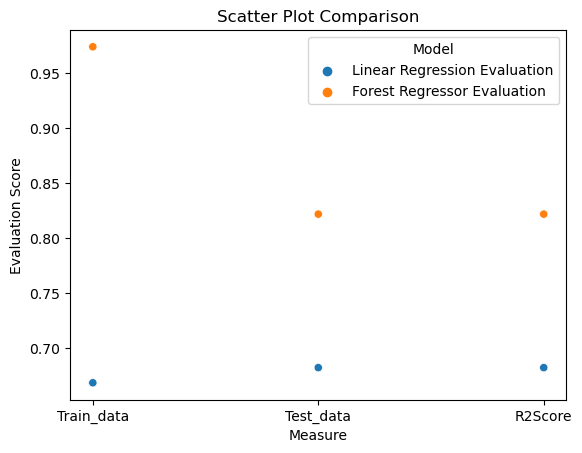

In [44]:
data_long = pd.melt(eval_df, id_vars=['Measure'], value_vars=['Linear Regression Evaluation', 'Forest Regressor Evaluation'],
                    var_name='Model', value_name='Evaluation Score')
sns.scatterplot(data=data_long, x="Measure", y="Evaluation Score", hue="Model")

plt.xlabel('Measure')
plt.ylabel('Evaluation Score')
plt.title('Scatter Plot Comparison')

plt.show()

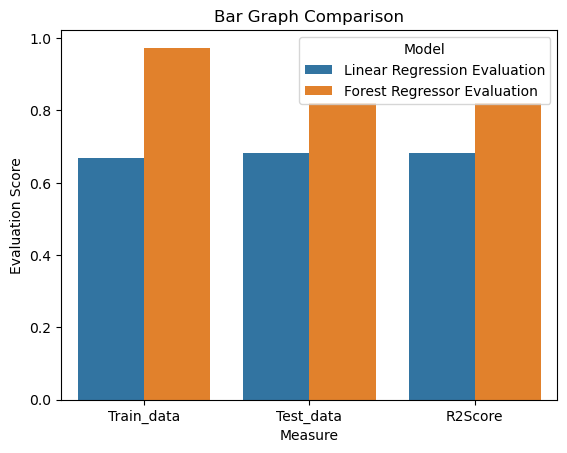

In [45]:
sns.barplot(data=data_long, x="Measure", y="Evaluation Score", hue="Model")

plt.xlabel('Measure')
plt.ylabel('Evaluation Score')
plt.title('Bar Graph Comparison')

plt.show()

In [46]:
forest.predict([[1.00895849, -0.81719509, -0.28350497,  0.50138838,  0.0471463 ,
        0.29577485,  0.20170303,  0.9585843 , -0.88880219,  1.45563404,
       -0.01564507, -0.35155493, -0.38278521, -0.85343965,  0.31153227]])

array([188385.02])